PCA on the two recommended feature subsets.

In [1]:
from os import listdir
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import colors
mycmap = colors.ListedColormap(['red','blue'])  # list color for label 0 then 1

In [2]:
pathR='data/ChunkedData_R/'
pathN='data/ChunkedData_NR/'
filesR = listdir(pathR)
filesN = listdir(pathN)
print(len(filesR)," files of type R")
print(len(filesN)," files of type N")

14  files of type R
26  files of type N


In [3]:
# Read one CSV file. Drop the date column.
def file_mean (filepath):
    mydata = pd.read_csv(filepath)
    # Drop the date column.
    mydata = mydata.drop('Date',axis=1) 
    # Transpose column of mean values into a row.
    mymean = mydata.mean(axis=0).to_frame().T
    return mymean

In [4]:
# Read directory of CSV files. Retain only one row per file = column averages.
def mean_per_file (directory):
    files = listdir(directory)
    means = pd.DataFrame()
    for fp in files:
        dfp = directory+fp
        m = file_mean(dfp)
        # Let Pandas number the rows sequentially.
        means = means.append(m,ignore_index=True)
    return means

In [5]:
meansR = mean_per_file(pathR)
meansR.describe()

,Morning_Question1,Morning_Question2,Morning_Question3,Morning_Question4,Morning_Question5,Morning_Question6,Afternoon_Question1,Afternoon_Question2,Afternoon_Question3,Afternoon_Question4,...,HR_mean,HR_var,HR_std,HR_sk,HR_ku,Stress_mean,Stress_var,Stress_std,Stress_sk,Stress_ku
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,2.771630,2.704766,3.684239,3.427975,2.393328,4.368998,3.686286,3.513472,2.736801,2.429426,...,79.327247,168.022421,12.358672,0.787483,0.662993,30.629987,449.669255,20.457643,0.917550,0.612431
std,1.339235,1.115521,1.206275,1.113369,0.893719,0.702195,1.221645,1.272435,1.147496,1.152266,...,3.769125,61.278871,2.289319,0.272895,0.669500,4.683535,105.003775,2.483785,0.268648,0.824843
min,1.000000,1.000000,1.000000,1.310345,1.517241,2.517241,1.000000,1.000000,1.000000,1.000000,...,74.539412,85.912121,9.195755,0.280961,-0.283663,23.014433,264.873317,15.284160,0.290027,-0.820974
25%,1.956981,2.169643,3.302760,2.539577,1.972222,3.958128,2.908279,3.087662,1.551724,1.310345,...,77.465143,104.751713,9.907677,0.591312,0.244217,28.117668,386.597363,18.933233,0.804227,0.240722
50%,2.857759,2.393939,3.928480,3.847222,2.064394,4.403941,4.000000,3.772727,3.000000,2.214286,...,78.904839,172.698871,12.686409,0.808753,0.448019,29.403302,442.825365,20.723560,0.986197,0.782005
75%,3.435737,3.758621,4.419540,4.000000,2.423701,4.979167,4.713362,4.326149,3.772727,3.607955,...,79.905215,214.698339,14.061540,1.040887,1.121867,32.695160,533.173782,22.052479,1.072589,0.855014
max,5.000000,4.448276,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.035714,3.962963,...,89.492347,258.342542,15.626514,1.102250,2.221792,39.126304,616.333657,24.128994,1.329738,2.395604


In [6]:
meansN = mean_per_file(pathN)
meansN.describe()

,Morning_Question1,Morning_Question2,Morning_Question3,Morning_Question4,Morning_Question5,Morning_Question6,Afternoon_Question1,Afternoon_Question2,Afternoon_Question3,Afternoon_Question4,...,HR_mean,HR_var,HR_std,HR_sk,HR_ku,Stress_mean,Stress_var,Stress_std,Stress_sk,Stress_ku
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,2.982123,2.888846,4.235503,3.537182,2.198923,4.308005,4.279549,4.207332,3.086296,2.498761,...,76.611583,159.975591,11.960036,0.683127,0.560790,30.689241,401.670527,18.861560,0.781198,1.112729
std,1.295793,1.195432,0.749181,1.094154,1.225848,0.605677,0.759156,0.893941,1.475356,1.406318,...,5.441676,81.101585,2.960623,0.284105,0.898365,8.503527,182.846846,5.082146,0.532732,1.924766
min,1.000000,1.000000,2.241379,1.000000,1.000000,3.375000,2.655172,1.965517,1.000000,1.000000,...,67.782868,56.488793,7.377522,0.122072,-0.705049,14.546611,104.996084,9.509846,-0.290844,-1.149331
25%,1.648348,2.206897,4.000000,2.969109,1.086207,3.758621,3.612069,3.810345,1.140445,1.000000,...,72.879550,101.738931,9.844374,0.526519,-0.145713,27.099043,239.313772,14.858416,0.493503,-0.113687
50%,3.465517,3.155093,4.162835,3.885776,2.035714,4.275223,4.431034,4.362069,3.716236,2.379310,...,76.319784,129.058084,11.141028,0.696458,0.353699,30.683653,449.767037,20.611773,0.745404,0.254687
75%,3.982759,3.913793,4.965517,4.000000,3.017241,4.913793,5.000000,5.000000,4.000000,3.721675,...,79.833627,206.797720,13.810337,0.879722,1.252244,37.073748,534.976423,22.557086,1.016159,2.623001
max,4.931034,4.555556,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,87.654594,375.786266,18.950565,1.223495,2.095290,48.321463,738.938880,26.660994,1.915858,5.422677


In [7]:
meansAll = pd.concat((meansR,meansN),ignore_index=True)
meansAll.shape

(40, 259)

In [8]:
def make_labels(positives,negatives):
    rows = positives.shape[0]
    labelsP = pd.DataFrame(np.ones(rows,dtype=np.int8))  # one = blue
    rows = negatives.shape[0]
    labelsN = pd.DataFrame(np.zeros(rows,dtype=np.int8))  # zero = red
    labelsAll = pd.concat((labelsP,labelsN),ignore_index=True)
    return labelsAll

In [9]:
labelsAll = make_labels(meansR,meansN)
labelsAll.T

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
def make_question_features(X,scale=True):
    c = X.columns[:13] # Excel columns B-N
    z = X[c]
    if scale:
        s = StandardScaler()
        z = s.fit_transform(z)
    return z
def make_physiol_features(X,scale=True):
    c = X.columns[249:] # Excel columns IQ-IZ
    z = X[c]
    if scale:
        s = StandardScaler()
        z = s.fit_transform(z)
    return z

In [11]:
X_questionFeatures = make_question_features(meansAll)
print(X_questionFeatures.shape)
pd.DataFrame(X_questionFeatures).describe()

(40, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01
mean,1.332268e-16,3.330669e-17,-2.220446e-17,-2.109424e-16,-4.274359e-16,2.331468e-16,-1.110223e-16,2.442491e-16,3.774758e-16,1.998401e-16,-1.110223e-17,1.110223e-16,-2.664535e-16
std,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00
min,-1.489156e+00,-1.596871e+00,-3.219979e+00,-2.326438e+00,-1.153037e+00,-2.900308e+00,-3.193490e+00,-2.782368e+00,-1.457334e+00,-1.141447e+00,-2.347875e+00,-1.857346e+00,-1.921208e+00
25%,-8.296349e-01,-5.895478e-01,-1.585779e-01,-5.768702e-01,-9.637646e-01,-7.478930e-01,-5.433315e-01,-4.241781e-01,-1.154855e+00,-1.027998e+00,-2.666562e-01,-8.257137e-01,-7.659096e-01
50%,3.674105e-01,2.773258e-03,-8.548999e-03,3.601116e-01,-1.897725e-01,1.193803e-01,-7.475273e-02,3.333719e-02,4.378757e-01,-9.465829e-02,4.204448e-01,-2.502093e-02,9.372016e-02
75%,7.575586e-01,9.685961e-01,9.037889e-01,4.664500e-01,4.474454e-01,9.739238e-01,9.648265e-01,9.425752e-01,7.481548e-01,9.723898e-01,8.287222e-01,6.708795e-01,6.193537e-01
max,1.632028e+00,1.515225e+00,1.013270e+00,1.397413e+00,2.487276e+00,1.073381e+00,9.648265e-01,9.719055e-01,1.510801e+00,1.955066e+00,8.287222e-01,1.513621e+00,1.466208e+00


In [12]:
X_physiolFeatures = make_physiol_features(meansAll)
print(X_physiolFeatures.shape)
pd.DataFrame(X_physiolFeatures).describe()

(40, 10)


,0,1,2,3,4,5,6,7,8,9
count,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,4.000000e+01,40.000000
mean,-2.220446e-16,1.110223e-16,1.998401e-16,1.443290e-16,7.771561e-17,-1.887379e-16,6.661338e-17,-2.220446e-17,8.881784e-17,0.000000
std,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739e+00,1.012739
min,-1.963622e+00,-1.453883e+00,-1.757631e+00,-2.151738e+00,-1.611398e+00,-2.228781e+00,-1.982460e+00,-2.290090e+00,-2.472769e+00,-1.295892
25%,-4.025902e-01,-8.505705e-01,-8.660902e-01,-6.536266e-01,-7.846670e-01,-4.036044e-01,-7.111493e-01,-5.507795e-01,-6.136200e-01,-0.646118
50%,-1.810998e-02,-1.738608e-01,-1.564499e-01,3.405516e-02,-2.282844e-01,-3.777222e-02,1.979270e-01,2.753521e-01,-3.861317e-02,-0.255305
75%,4.875615e-01,6.486878e-01,7.206892e-01,8.982624e-01,7.198610e-01,7.741105e-01,7.550685e-01,6.626610e-01,5.305690e-01,0.393419
max,2.395551e+00,2.913072e+00,2.550073e+00,1.814217e+00,2.012042e+00,2.440444e+00,2.026696e+00,1.673211e+00,2.400276e+00,2.784987


In [13]:
def show_PC_variance_explained(X,model):
    pca.fit(X)
    e1,e2,e3=pca.explained_variance_ratio_[:3]*100.0
    print("Variance explained by PC1=%.2f%% PC2=%.2f%% PC3=%.2f%%"%(e1,e2,e3))
def show_PC_eigenvalues(X,model):
    pca.fit(X)
    e1,e2,e3=pca.lambdas_[:3]
    print("Eigenvalues EV1=%.2f EV2=%.2f EV3=%.2f"%(e1,e2,e3))
def plot_PCA (X,labels,model):  
    lims=[-5,5]  #  Use this if defaults don't work:   ax1d.set_xlim(lims)
    fig = plt.figure(figsize=(10,3))
    transformed=pca.fit_transform(X)
    pc1,pc2,pc3 = np.split(transformed,3,axis=1)
    # Plot first PC as histogram
    ax1d = fig.add_subplot(131)
    ax1d.set_title('First PC')
    ax1d.hist(pc1[:13],histtype='step',color='blue')  # TO DO: use iloc where label = 1
    ax1d.hist(pc1[13:],histtype='step',color='red')  # TO DO: use iloc where label = 0
    # Plot first 2 PCs in 2D. 
    ax2d = fig.add_subplot(132)
    ax2d.set_title('First 2 PCs')
    ax2d.scatter(pc1,pc2,c=labels,cmap=mycmap)
    # Plot first 3 PCs in 3D.
    ax3d = fig.add_subplot(133,projection='3d')
    ax3d.set_title('First 3 PCs')
    ax3d.scatter(pc1,pc2,pc3,c=labels,cmap=mycmap)
    # Output to screen.
    plt.show()

PCA of total feature space:
Variance explained by PC1=67.77% PC2=12.20% PC3=5.97%


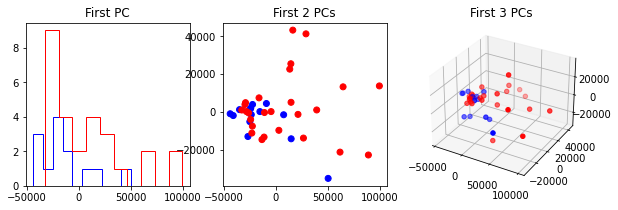

In [14]:
pca=PCA(n_components=3)
print("PCA of total feature space:")
show_PC_variance_explained(meansAll,pca)
plot_PCA(meansAll,labelsAll,pca)

PCA of question feature space:
Variance explained by PC1=36.77% PC2=33.23% PC3=9.65%


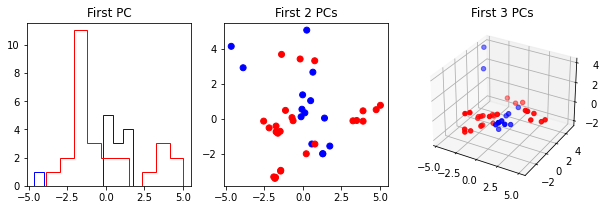

PCA of physiol feature space:
Variance explained by PC1=51.34% PC2=22.66% PC3=13.49%


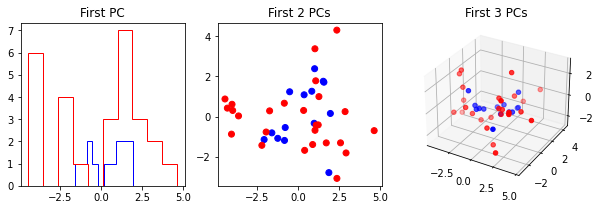

In [15]:
print("PCA of question feature space:")
show_PC_variance_explained(X_questionFeatures,pca)
plot_PCA(X_questionFeatures,labelsAll,pca)
print("PCA of physiol feature space:")
show_PC_variance_explained(X_physiolFeatures,pca)
plot_PCA(X_physiolFeatures,labelsAll,pca)

Kernal PCA of question feature space:
Eigenvalues EV1=178.88 EV2=75.76 EV3=61.20


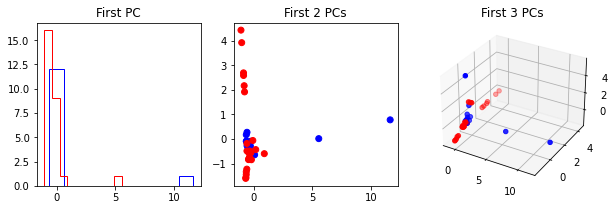

Kernel PCA of physiol feature space:
Eigenvalues EV1=117.65 EV2=61.73 EV3=43.27


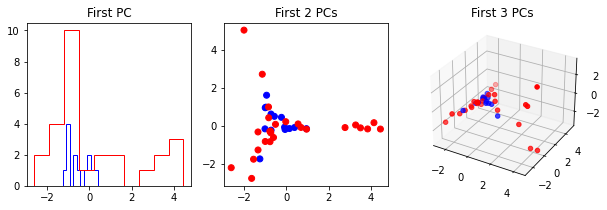

In [16]:
pca=KernelPCA(n_components=3, kernel="poly", gamma=None)
print("Kernal PCA of question feature space:")
show_PC_eigenvalues(X_questionFeatures,pca)
plot_PCA(X_questionFeatures,labelsAll,pca)
print("Kernel PCA of physiol feature space:")
show_PC_eigenvalues(X_physiolFeatures,pca)
plot_PCA(X_physiolFeatures,labelsAll,pca)